## Summary and Goal

Connor Gramling, John Hohman, Lynn Slutsky

Our goal is to find the best place to for a new upcoming super hero named THE STEEL VENGEANCE. He is looking for somewhere cheap with a high crime rate.

## Property Data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import scipy.stats as stats
%matplotlib inline

In [ ]:
code code code

## Arrest Data

In [3]:
pd.set_option('display.max_rows', None)
arrests = pd.read_csv("Pittsburgh Police Arrest Data.csv", usecols=['INCIDENTNEIGHBORHOOD', 'OFFENSES'])

hoods = arrests.groupby('INCIDENTNEIGHBORHOOD').count()
hoods_ordered = hoods['OFFENSES'].sort_values(ascending=True)
hoods_ordered

INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood           2
Troy Hill-Herrs Island            6
Mt. Oliver Boro                  18
Central Northside                23
Regent Square                    28
Ridgemont                        29
Swisshelm Park                   33
New Homestead                    35
Chartiers City                   35
St. Clair                        42
East Carnegie                    44
Outside County                   46
Outside State                    52
Summer Hill                      60
Oakwood                          69
Golden Triangle/Civic Arena      83
Hays                             94
Windgap                          94
Fairywood                       100
Mount Oliver                    108
Allegheny West                  109
Arlington Heights               122
Glen Hazel                      136
Polish Hill                     137
Friendship                      143
Upper Lawrenceville             161
Morningside                     167
Duquesn

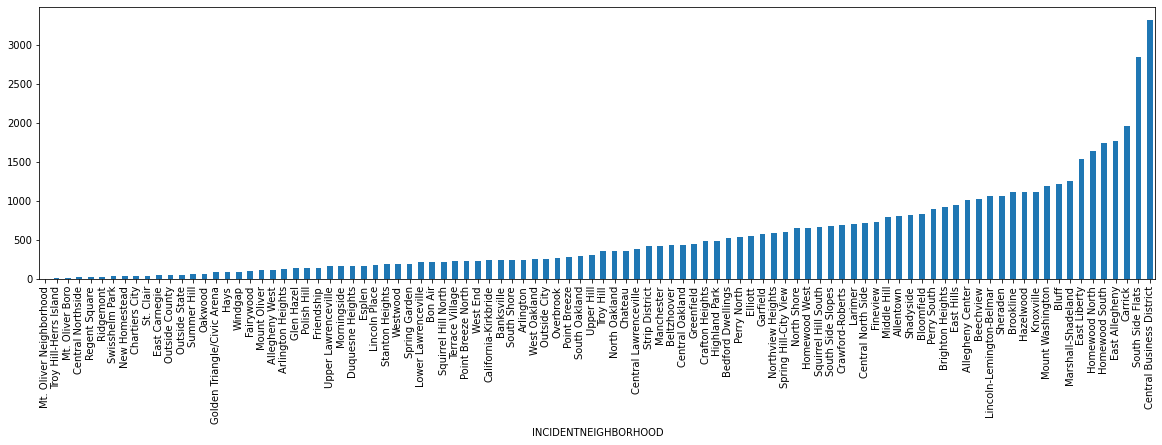

In [4]:
hoods_ordered.plot.bar(figsize = (20,5))

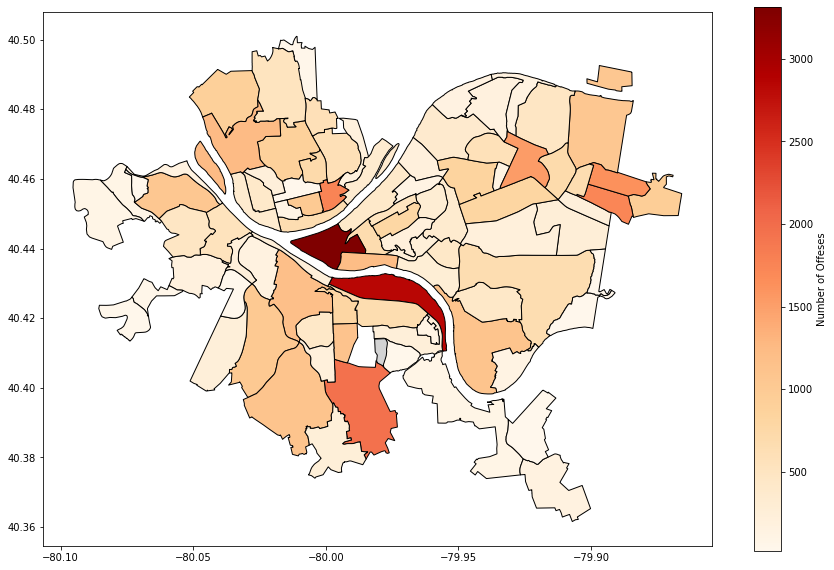

In [5]:
neighborhoods = geopandas.read_file("Pitt/Neighborhoods_.shp")
reports_map = neighborhoods.merge(hoods, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
reports_map[['hood','OFFENSES','geometry']]
reports_map.plot( column = 'OFFENSES',
                cmap='OrRd',
                edgecolor="black",
                legend=True,
                legend_kwds={'label': "Number of Offeses"},
                figsize=(15, 10),
                missing_kwds={"color": "lightgrey"}
                )

## Incidents Data

In [13]:
reports = pd.read_csv("police.csv")



num_reports = reports.groupby("INCIDENTNEIGHBORHOOD").nunique()



num_reports = num_reports.sort_values('PK', ascending=True)
std = num_reports["PK"].std()
mean = num_reports["PK"].mean()
print("std: ", std)
print("mean: ", mean)
print("mean: ", num_reports.shape)

<ipython-input-13-d89f8565049b>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reports = pd.read_csv("police.csv")


std:  1269.4567703080754
mean:  977.1190476190476
mean:  (84, 12)


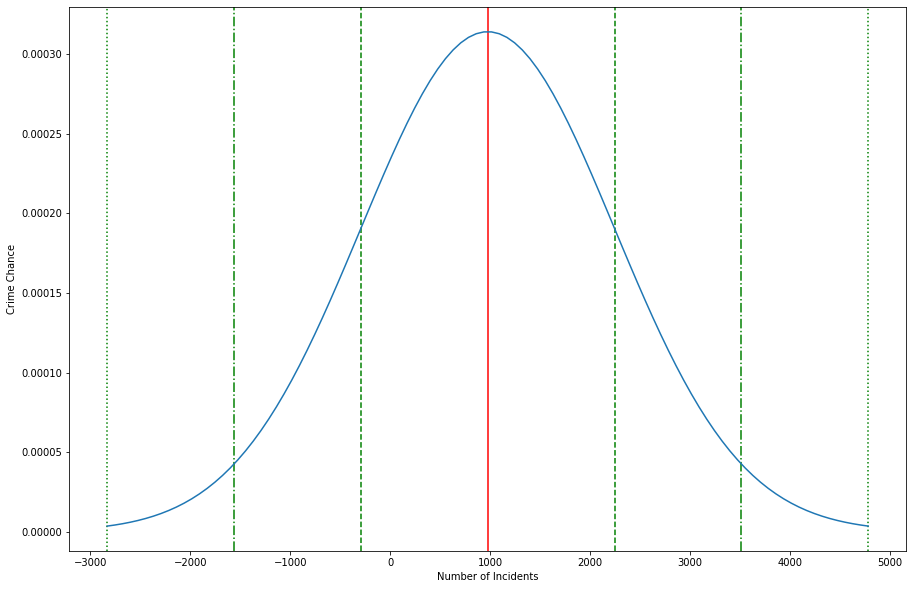

In [14]:
x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.figure(figsize=(15,10))
plt.ylabel('Crime Chance')
plt.xlabel('Number of Incidents')
plt.axvline(mean, color='r', linestyle='solid')
plt.axvline((mean + std), color='g', linestyle='--')
plt.axvline((mean - std), color='g', linestyle='--')
plt.axvline((mean + 2*std), color='g', linestyle='-.')
plt.axvline((mean - 2*std), color='g', linestyle='-.')
plt.axvline((mean + 3*std), color='g', linestyle=':')
plt.axvline((mean - 3*std), color='g', linestyle=':')
plt.plot(x, stats.norm.pdf(x, mean, std))
plt.show()

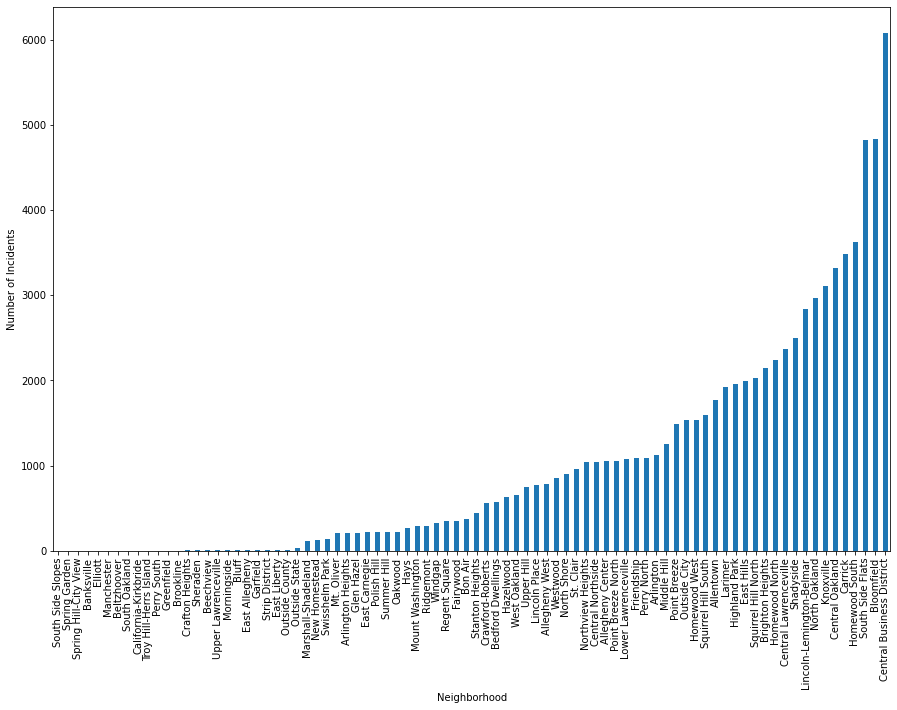

In [15]:
num_reports["PK"].plot.bar(figsize=(15,10))
plt.xlabel('Neighborhood')
plt.ylabel('Number of Incidents')
plt.show()

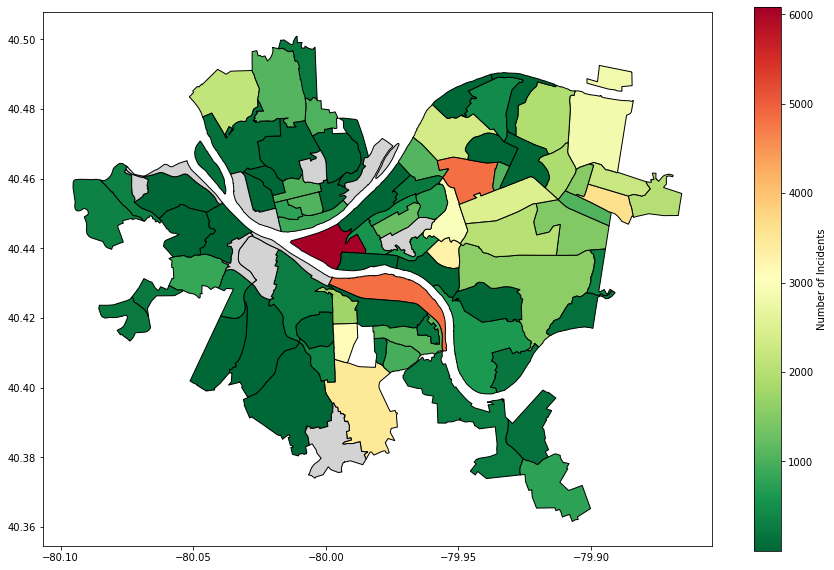

In [22]:
neighborhoods = geopandas.read_file("Pitt/Neighborhoods_.shp")


reports_map = neighborhoods.merge(num_reports["PK"], how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')

reports_map[['hood','PK','geometry']]

reports_map.plot(column='PK', cmap=plt.cm.get_cmap('RdYlGn').reversed(), edgecolor="Black", legend=True, legend_kwds={'label': "Number of Incidents"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})

## Conmbined Data

In [ ]:
code code code

## Conclusion